# Prediction of Wine Quality based on its Manufacturing Ingredients

### Submitted By: Twisha Jain (tj2481), Rakshith Kamath (rk3165), Rahulraj Singh (rs4211), Yue Zhang (yz4155), Kechengjie Zhu (kz2407)

According to Statista.com, revenue from the global wine market stood at 340.8 billion US dollars in 2020 which is roughly 25% of the entire global beverages market revenue. From all wine varieties, the most ordered and consumed ones across the globe are Red and White. So, what makes wine such a loved drink through geographies? In this project, we will aim to study wine sourced from grapes in the north-western region of Vinho Verde in Portugal, which is one of the world’s largest wine producers, amounting to 85 million litres of wine each year. From the wine formulation data available to us, we investigate what impacts the quality of wine. Based on the results from the analysis of physicochemical features that make a high-quality wine, we will attempt to build a recommender system for indicators that point manufacturers to using the best composition for their wine.

## 1. Data Importing and Initial Exploration

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from pprint import pprint
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,auc,average_precision_score,classification_report,roc_auc_score,log_loss,roc_curve, precision_recall_curve,auc,average_precision_score
import imblearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
%matplotlib inline
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [5]:
df =  pd.read_csv('https://raw.githubusercontent.com/rjrahul24/AppliedML-Project/main/data/winequalityN.csv',sep = ",")
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
missingness = df.groupby('type').apply(lambda x: x.isna().mean()*100)
missingness

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
type                                                                        
red     0.0       0.125078          0.062539     0.062539        0.000000   
white   0.0       0.163332          0.142915     0.040833        0.040833   

       chlorides  free sulfur dioxide  total sulfur dioxide  density  \
type                                                                   
red     0.000000                  0.0                   0.0      0.0   
white   0.040833                  0.0                   0.0      0.0   

             pH  sulphates  alcohol  quality  
type                                          
red    0.125078   0.125078      0.0      0.0  
white  0.142915   0.040833      0.0      0.0

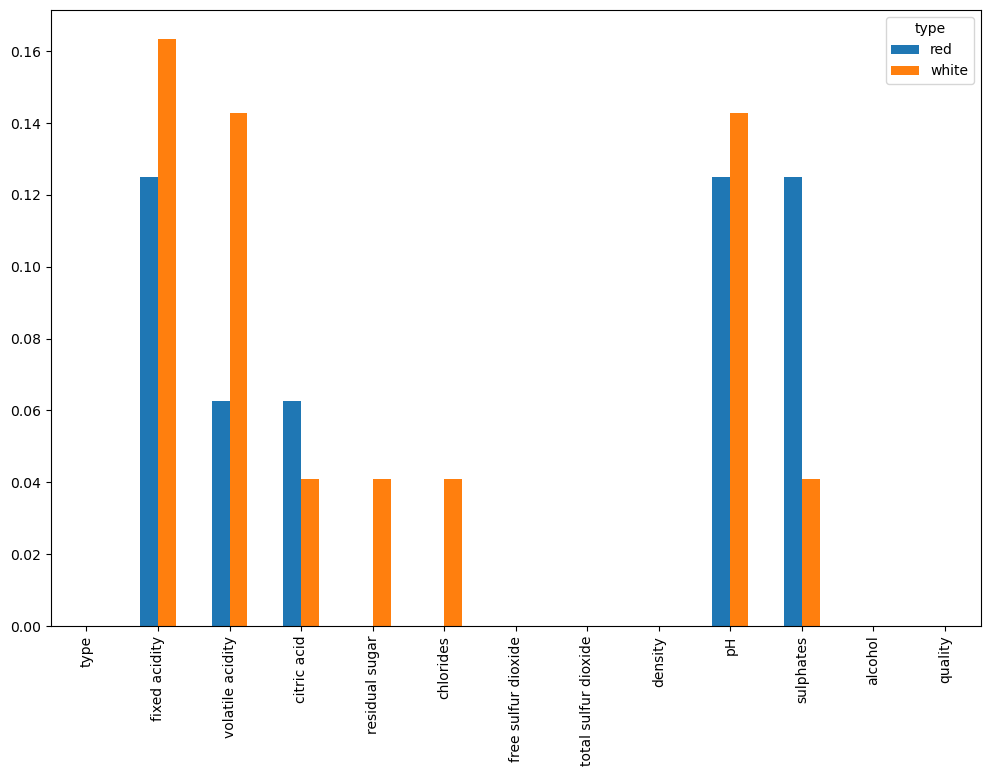

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
missingness.T.plot(kind='bar',ax=ax)
plt.show()

Since the missing entries account for only 0.04% of the total data points, we will drop the missing values as they would not significantly contribute to the model building and predictions.

In [9]:
df = df.dropna(axis=0)
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [10]:
df.isna().mean()

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

There's no missing value after processing.

In [11]:
# Transforming the 'Type' Variable to read with 0 and 1 
df = df.replace('red', 0)
df = df.replace('white', 1)

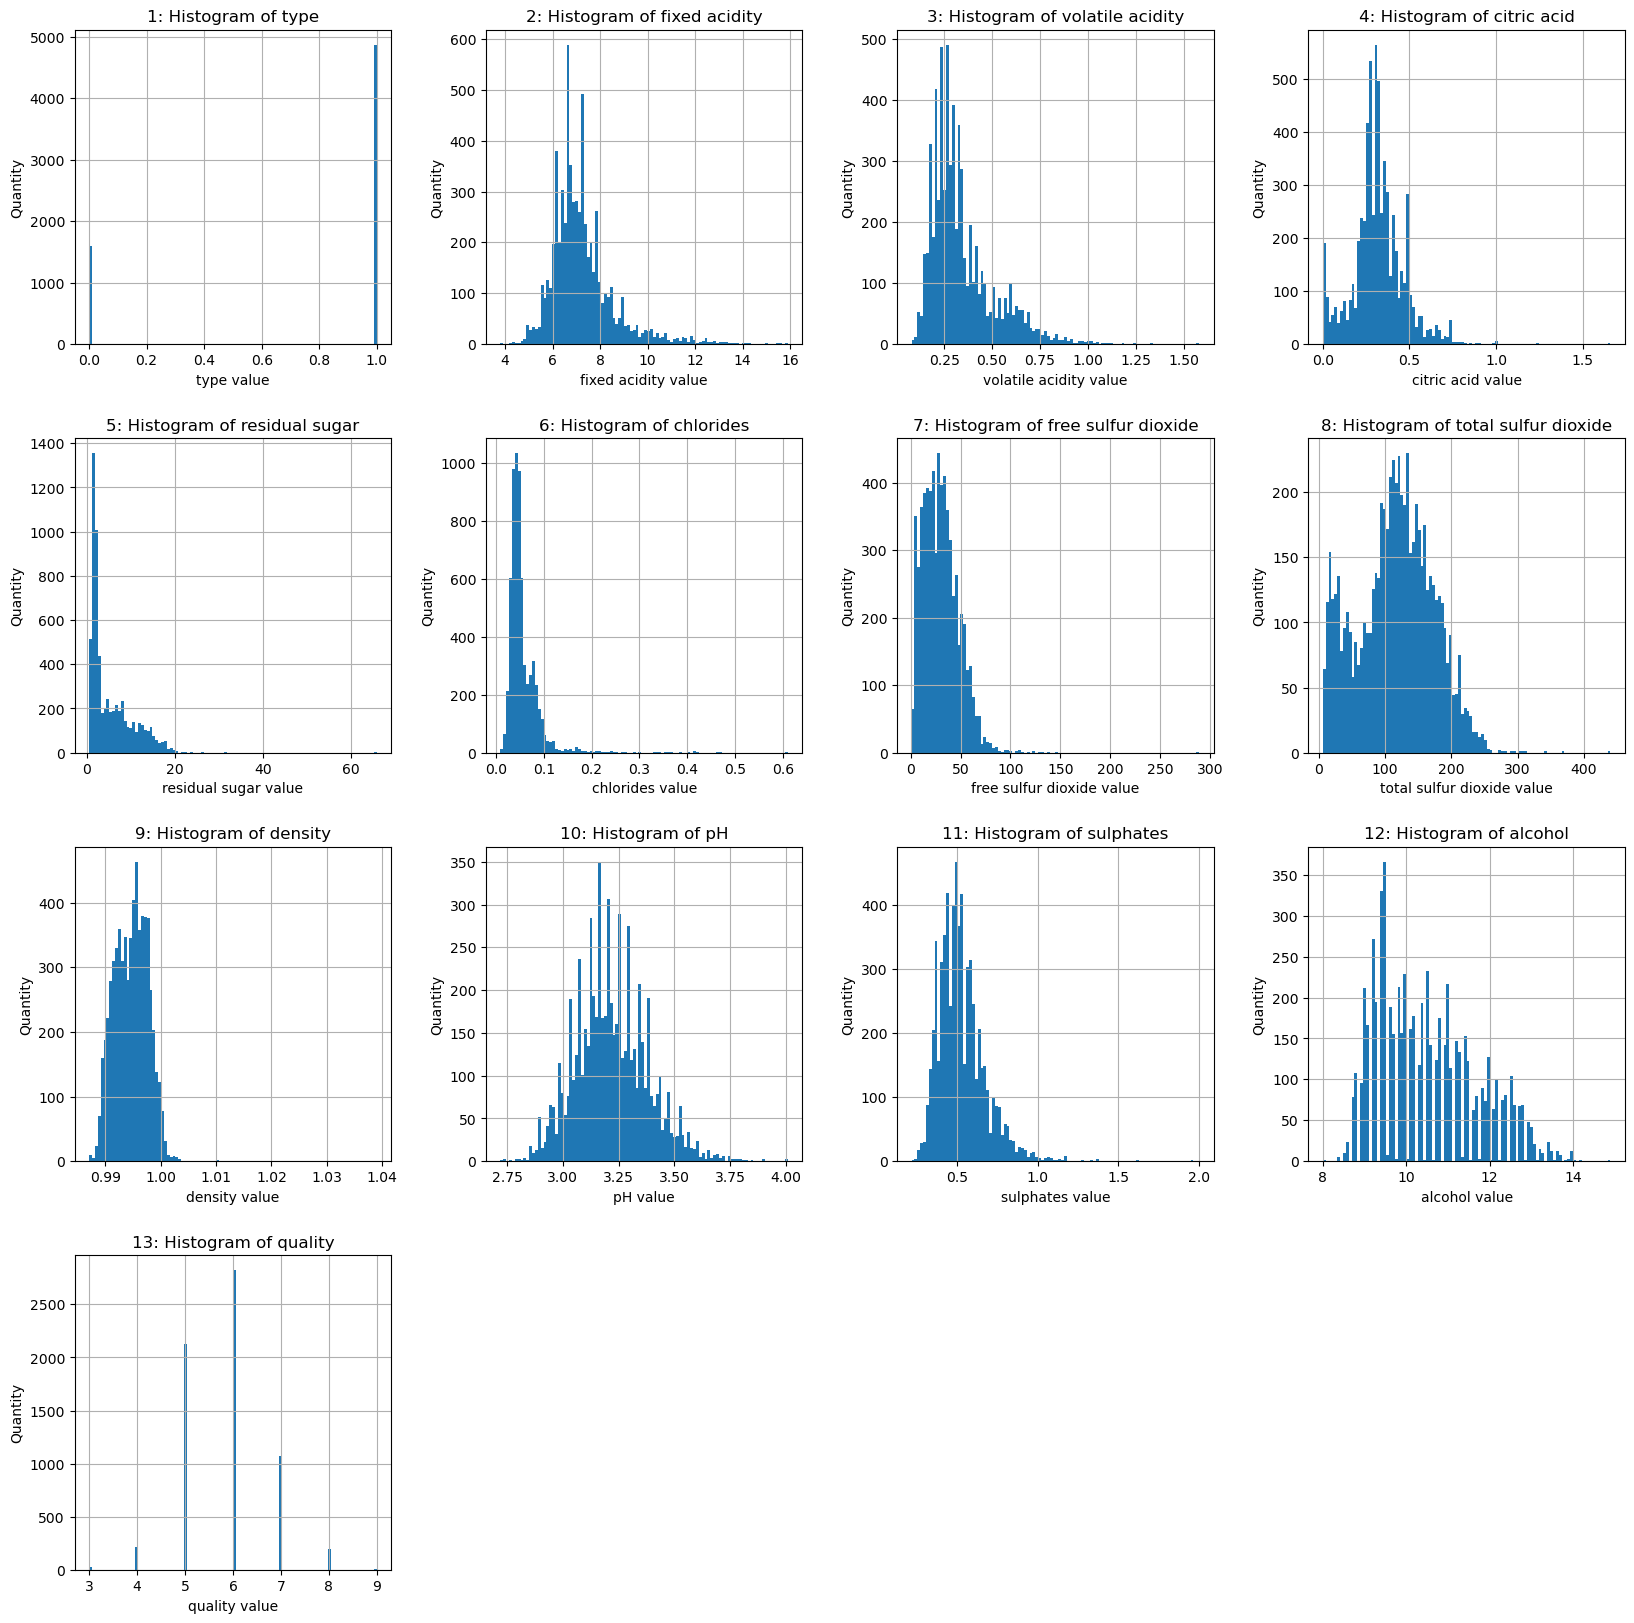

In [12]:
fig_ax = df.hist(bins = 100, figsize = (20, 20))
i=1
for ax in fig_ax.flatten():
    ax.set_xlabel(f"{ax.get_title()} value")
    ax.set_ylabel("Quantity")
    title = ax.get_title() 
    ax.set_title(f"%d: Histogram of {title}" % (i)) 
    i=i+1
plt.show()

In [13]:
sns.pairplot(df,hue='type')

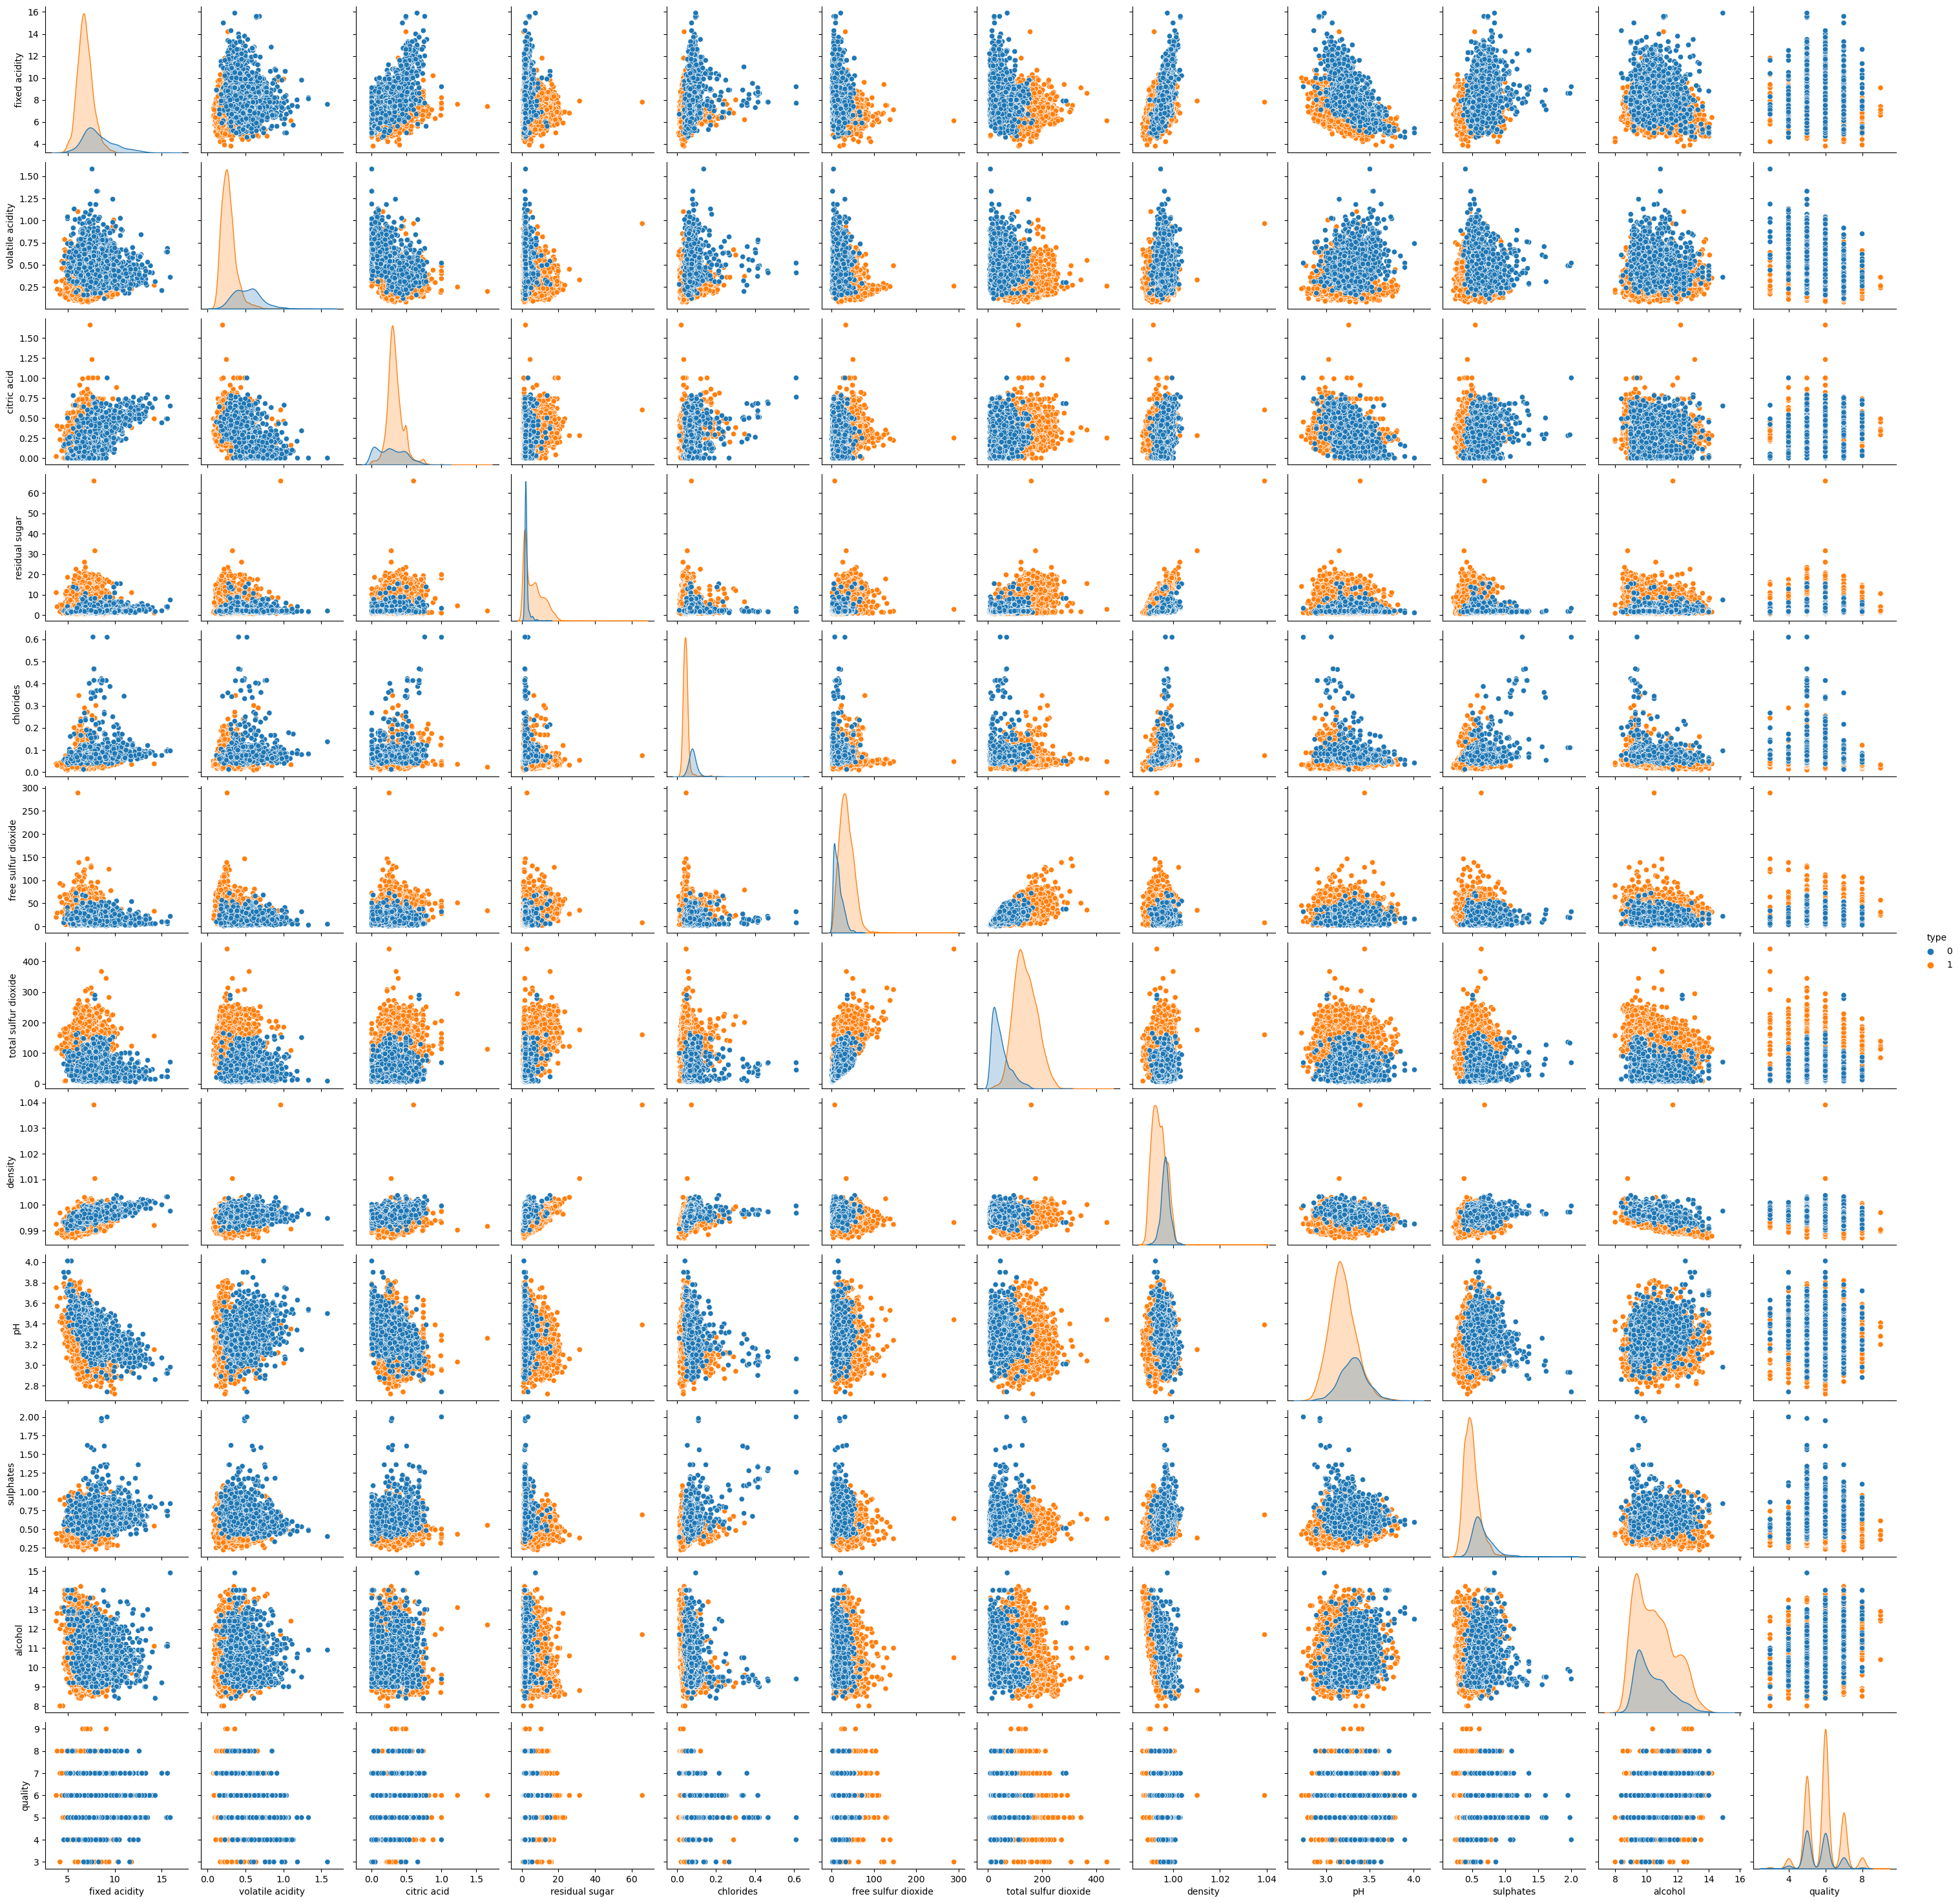

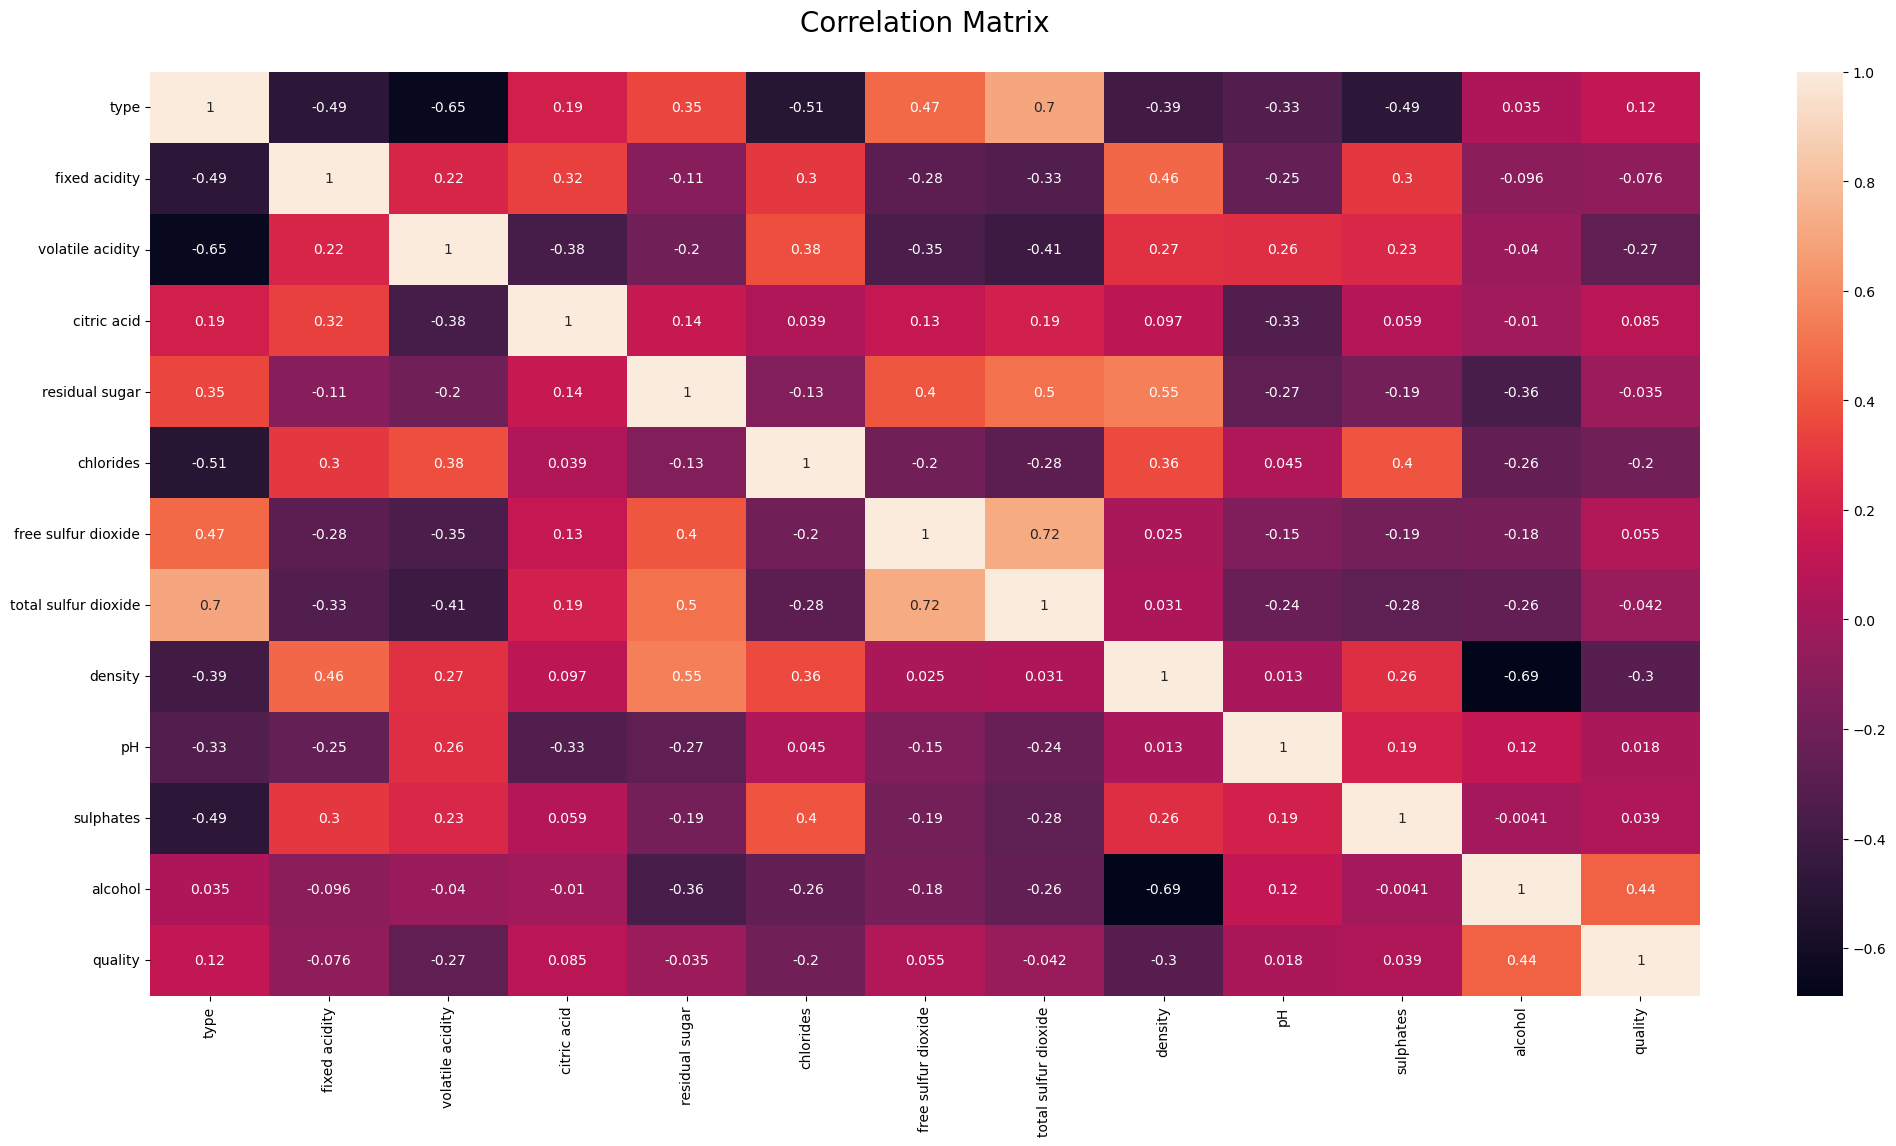

In [14]:
plt.figure(figsize = (25, 12))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix\n', fontsize = 20)
plt.show()

**Study of Correlations between Feature and Target Variable**

From the pair plots and the calculation of correlation, we see the following relations between the feature and target variables.

1.   The feature variables affecting the outcome of wine quality the most are volatile acidity, chlorides, density and alcohol.
2.   Alcohol shows a strong positive correlation while the other variables represent strong negative correlations.
3. Fixed Acidity, Residual Sugar, and Total Sulfur Dioxide have weak negative correlation with wine quality. 
4. Citric Acid, Free Sulfur Dioxide, pH and Sulphates have significantly weak positive correlation with the quality of wine. 




## 2. Data Split and Preparation

In [15]:
stratified = df.groupby('quality', group_keys=False).apply(lambda x: x.sample(2))
stratified.mean()

type                     0.714286
fixed acidity            7.578571
volatile acidity         0.333571
citric acid              0.362857
residual sugar           4.603571
chlorides                0.059429
free sulfur dioxide     29.964286
total sulfur dioxide    95.642857
density                  0.994205
pH                       3.192857
sulphates                0.552857
alcohol                 10.803571
quality                  6.000000
dtype: float64

In [16]:
random = df.sample(frac=0.45, replace=True, random_state=1)
random.mean()

type                      0.756190
fixed acidity             7.181568
volatile acidity          0.340232
citric acid               0.317493
residual sugar            5.636176
chlorides                 0.054736
free sulfur dioxide      30.340440
total sulfur dioxide    116.548143
density                   0.994777
pH                        3.219298
sulphates                 0.527809
alcohol                  10.475935
quality                   5.831155
dtype: float64

In [17]:
def quality_to_label(x):
  if x < 7:
    return 'poor'
  else:
    return 'good'

In [18]:
X = df[['type', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']]
y = df.quality.apply(lambda x:quality_to_label(x))

# Split into Train (80%) and Test (20%) Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Split the training data into Development (80%) and Validation (20%) Datasets
X_dev, X_val, y_dev, y_val = train_test_split(X_train, y_train, train_size = 0.8, random_state = 42)

In [19]:
y_dev.value_counts()

poor    3326
good     810
Name: quality, dtype: int64

**PreProcessing**

In [20]:
scaler = MinMaxScaler()
# Reconstructing the dataset
feature_names=['type', 'fixed acidity',
               'volatile acidity','citric acid',
               'residual sugar','chlorides',
               'free sulfur dioxide', 'total sulfur dioxide',
               'density','pH',
               'sulphates','alcohol']
preprocess = make_column_transformer((StandardScaler(),feature_names))

## Model Building and Evaluation

### 1. Logistic Regression

Here since there are multiple classes of wine in the dataset we use Multinomial logisitic regression for our problem.

In [21]:
logistic_pipe = Pipeline(steps=[('preprocess', preprocess), ('multiLog',LogisticRegression())])
param_grid_log = {
    'multiLog__penalty':['l2'],
    'multiLog__C': [100,10, 1.0, 0.1,0.01],
    'multiLog__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'] #Liblinear doesnt suport multinomial
}

logistic_cv = GridSearchCV(
    logistic_pipe, 
    param_grid = param_grid_log,
    cv = 10,
    error_score='raise')

logistic_cv.fit(X_dev, y_dev)



GridSearchCV(cv=10, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['type',
                                                                          'fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                  

Best Parameters for Multinomial Logistic Regression

In [22]:
print(f'Best Parameters: {logistic_cv.best_params_}')
print(f'Best Score: {logistic_cv.best_score_}')

Best Parameters: {'multiLog__C': 1.0, 'multiLog__penalty': 'l2', 'multiLog__solver': 'newton-cg'}
Best Score: 0.8174544688914622


Checking Accuracy for validation and test sets

the Accuracy on the validation dataset is 0.8278529980657641


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


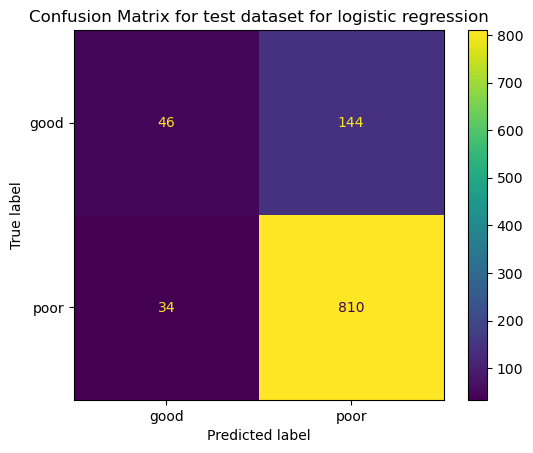

In [23]:
y_pred=logistic_cv.predict(X_val)
accuracy=np.count_nonzero(y_pred == y_val)/y_val.shape[0] 
print(f"the Accuracy on the validation dataset is {accuracy}")
plot_confusion_matrix(logistic_cv,X_val, y_val)  
plt.title("Confusion Matrix for test dataset for logistic regression")
plt.show()

the Accuracy on the test dataset is 0.8205723124516628


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


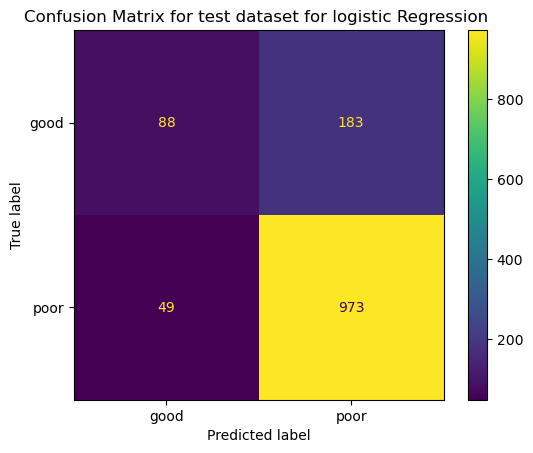

In [24]:
y_pred=logistic_cv.predict(X_test)
accuracy=np.count_nonzero(y_pred == y_test)/y_test.shape[0] 
print(f"the Accuracy on the test dataset is {accuracy}")
plot_confusion_matrix(logistic_cv,X_test, y_test)  
plt.title("Confusion Matrix for test dataset for logistic Regression ")
plt.show()

Clearly we can see that even after hyper-parameter tuning it is able to find the average wines and good wines whose number is abundant. It is not able to find the best and poor wines making it not such a good model for wine classification as it is not able to reccomend the outliers at all.

Feature Importance for the logistic Regression model that is fitted.

Text(0, 0.5, 'weights')

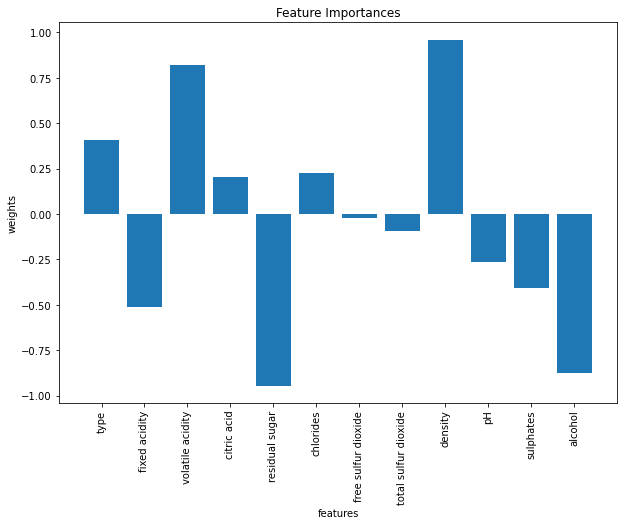

In [67]:
lr=logistic_cv.best_estimator_.named_steps['multiLog'].coef_[0]
plt.figure(figsize=(10,7))
plt.bar(feature_names,lr)
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.xlabel('features')
plt.ylabel('weights')

Plotting various metrics such as AUC and PR curves also returning F1 score for the above model.

In [29]:
y_pred=logistic_cv.predict(X_test)
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

        good       0.64      0.32      0.43       271
        poor       0.84      0.95      0.89      1022

    accuracy                           0.82      1293
   macro avg       0.74      0.64      0.66      1293
weighted avg       0.80      0.82      0.80      1293



In [30]:
y_prob=logistic_cv.best_estimator_.predict_proba(X_test)
score=roc_auc_score(y_test, y_prob[:,1], average="weighted")

print(f"Weighted ROC AUC socore is {score:.3f}")
print(f"The log loss for the following p0roblem using logistic regression is {log_loss(y_test, y_prob[:,1]):.3f}")

Weighted ROC AUC socore is 0.827
The log loss for the following p0roblem using logistic regression is 0.392


### 2. SVM

In [31]:
SVM_pipe = Pipeline(steps=[('preprocess', preprocess), ('SVM',SVC())])
param_grid_SVM = {
    'SVM__kernel':['linear', 'poly', 'rbf'],
    'SVM__C': [10, 1.0, 0.1],
    'SVM__class_weight':[None,'balanced']
    }
SVM_cv = GridSearchCV(
    SVM_pipe, 
    param_grid = param_grid_SVM,
    cv = 3,
    error_score='raise')

SVM_cv.fit(X_dev, y_dev)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['type',
                                                                          'fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                   

Best Parameter for SVM are as follows-

In [32]:
print(f'Best Parameters: {SVM_cv.best_params_}')
print(f'Best Score: {SVM_cv.best_score_}')

Best Parameters: {'SVM__C': 10, 'SVM__class_weight': None, 'SVM__kernel': 'rbf'}
Best Score: 0.8295449083687757


Scores for validation and test sets

the Accuracy on the validation dataset is 0.8578336557059961


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


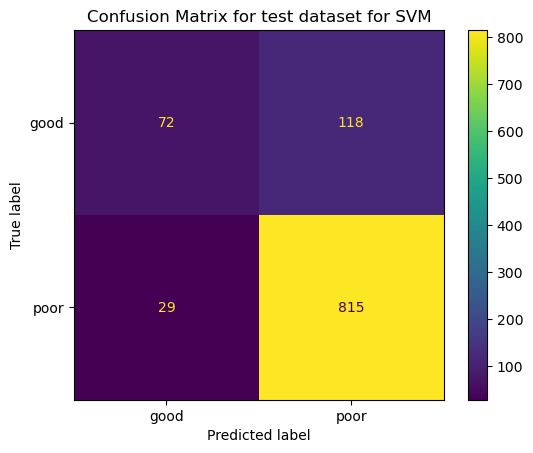

In [33]:
y_pred=SVM_cv.predict(X_val)
accuracy=np.count_nonzero(y_pred == y_val)/y_val.shape[0] 
print(f"the Accuracy on the validation dataset is {accuracy}")
plot_confusion_matrix(SVM_cv,X_val, y_val)  
plt.title("Confusion Matrix for test dataset for SVM")
plt.show()

the Accuracy on the test dataset is 0.8368136117556071


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


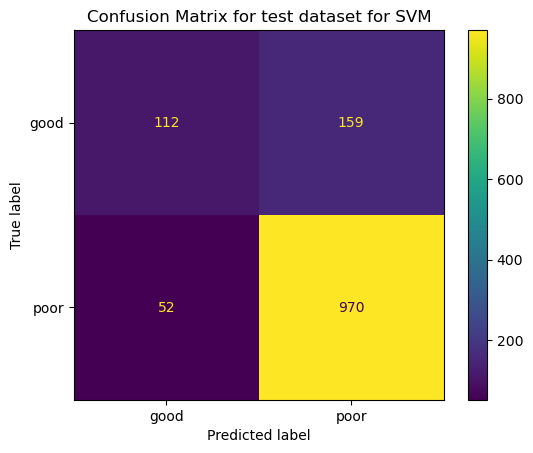

In [34]:
y_pred=SVM_cv.predict(X_test)
accuracy=np.count_nonzero(y_pred == y_test)/y_test.shape[0] 
print(f"the Accuracy on the test dataset is {accuracy}")
plot_confusion_matrix(SVM_cv,X_test, y_test)  
plt.title("Confusion Matrix for test dataset for SVM")
plt.show()

Number of support vectors that are used to solve the Above problem

In [35]:
support_vectors=SVM_cv.best_estimator_.named_steps['SVM'].support_vectors_
print(f'Number of support vectors in rbf kernel are {support_vectors.shape[0]}')


Number of support vectors in rbf kernel are 1602


Calculating various metrics for the above model.

In [36]:
y_pred=SVM_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        good       0.68      0.41      0.51       271
        poor       0.86      0.95      0.90      1022

    accuracy                           0.84      1293
   macro avg       0.77      0.68      0.71      1293
weighted avg       0.82      0.84      0.82      1293



### 3. Trying SMOTE with SVM

In [37]:
smote = SMOTE(random_state = 42,k_neighbors=2)
X_smote, y_smote = smote.fit_resample(X_dev, y_dev)
print(f'Shape of the development features matrix {X_smote.shape}')
print("Target labels counts are-")
y_smote.value_counts()

Shape of the development features matrix (6652, 12)
Target labels counts are-


poor    3326
good    3326
Name: quality, dtype: int64

In [38]:
logistic_cv.fit(X_smote, y_smote)
print(f'Best Parameters: {logistic_cv.best_params_}')
print(f'Best Score: {logistic_cv.best_score_}')

Best Parameters: {'multiLog__C': 0.1, 'multiLog__penalty': 'l2', 'multiLog__solver': 'newton-cg'}
Best Score: 0.7420352683510578


In [39]:
SVM_cv.fit(X_smote, y_smote)
print(f'Best Parameters: {SVM_cv.best_params_}')
print(f'Best Score: {SVM_cv.best_score_}')

Best Parameters: {'SVM__C': 10, 'SVM__class_weight': None, 'SVM__kernel': 'rbf'}
Best Score: 0.8472657589338551


In [40]:
y_pred=SVM_cv.predict(X_test)
print(f"the Accuracy on the test dataset is {accuracy}")

the Accuracy on the test dataset is 0.8368136117556071


the Accuracy on the test dataset is 0.774168600154679


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


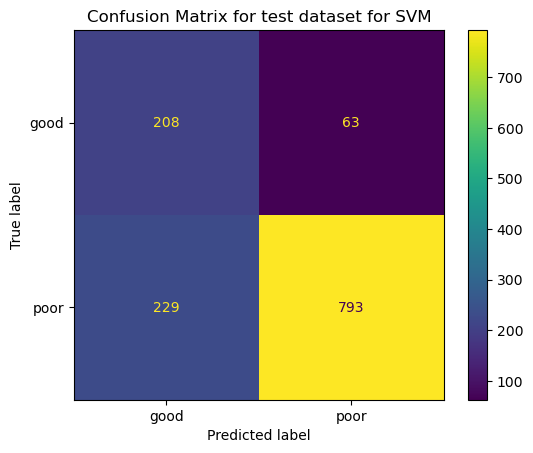

In [41]:
y_pred=SVM_cv.predict(X_test)
accuracy=np.count_nonzero(y_pred == y_test)/y_test.shape[0] 
print(f"the Accuracy on the test dataset is {accuracy}")
plot_confusion_matrix(SVM_cv,X_test, y_test)  
plt.title("Confusion Matrix for test dataset for SVM")
plt.show()

In [42]:
support_vectors=SVM_cv.best_estimator_.named_steps['SVM'].support_vectors_
print(f'Number of support vectors in rbf kernel are {support_vectors.shape[0]}')

Number of support vectors in rbf kernel are 2708


In [43]:
y_pred=SVM_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        good       0.48      0.77      0.59       271
        poor       0.93      0.78      0.84      1022

    accuracy                           0.77      1293
   macro avg       0.70      0.77      0.72      1293
weighted avg       0.83      0.77      0.79      1293



### 4. Linear Regression

In [51]:
df_lin =  pd.read_csv('https://raw.githubusercontent.com/rjrahul24/AppliedML-Project/main/data/wine_quality_pre.csv',sep = ",")
df_lin.head()

Unnamed: 0  type  fixed acidity  volatile acidity  citric acid  \
0           0     1            7.0              0.27         0.36   
1           1     1            6.3              0.30         0.34   
2           2     1            8.1              0.28         0.40   
3           3     1            7.2              0.23         0.32   
4           4     1            7.2              0.23         0.32   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0            20.7      0.045                 45.0                 170.0   
1             1.6      0.049                 14.0                 132.0   
2             6.9      0.050                 30.0                  97.0   
3             8.5      0.058                 47.0                 186.0   
4             8.5      0.058                 47.0                 186.0   

   density    pH  sulphates  alcohol  quality  good  
0   1.0010  3.00       0.45      8.8        6     0  
1   0.9940  3.30       0.49      9.5        6     0  
2   0.9951  3.26       0.44     10.1        6     0  
3   0.9956  3.19       0.40      9.9        6     0  
4   0.9956  3.19       0.40      9.9        6     0

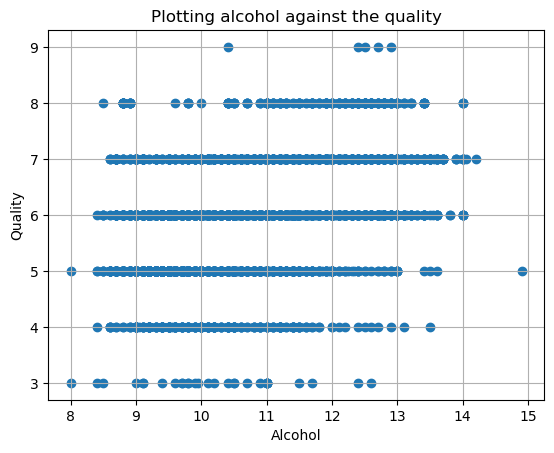

In [52]:
plt.scatter(df_lin['alcohol'],df_lin['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Plotting alcohol against the quality')
plt.grid(True)
plt.show()
#There is a weak positive relationship betweeen wine quality and alcohol content. Wines with high alcohol content are mostly high in quality

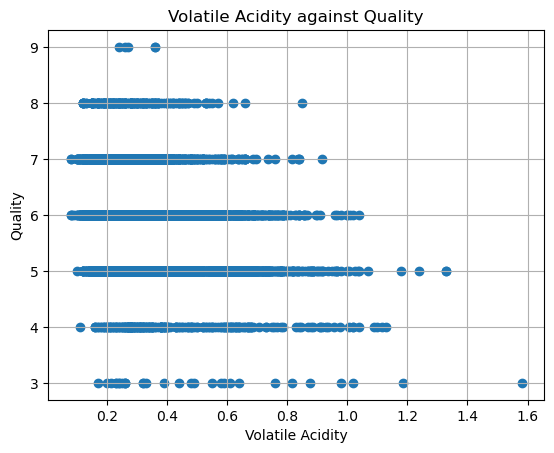

In [53]:
plt.scatter(df_lin['volatile acidity'],df_lin['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity against Quality')
plt.grid(True)
plt.show()
#There is a negative relationship between volatile acidity and quality

In [56]:
X = df_lin[['type', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']]
y = df_lin['quality']

# Split into Train (80%) and Test (20%) Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Split the training data into Development (80%) and Validation (20%) Datasets
X_dev, X_val, y_dev, y_val = train_test_split(X_train, y_train, train_size = 0.8, random_state = 42)

In [57]:
scalerMethod = StandardScaler().fit(X_dev)
X_dev = scalerMethod.transform(X_dev)
X_test = scalerMethod.transform(X_test)
X_val = scalerMethod.transform(X_val)

In [58]:
#Creating the linear regression model and fitting the data to it
regressor=LinearRegression()
regressor.fit(X_dev,y_dev)
y_prediction_dev=regressor.predict(X_dev)
y_prediction_val=regressor.predict(X_val)
y_prediction_test=regressor.predict(X_test)

In [59]:
# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error Dev: %.2f" % mean_squared_error(y_dev, y_prediction_dev))
print("Mean squared error Val: %.2f" % mean_squared_error(y_val, y_prediction_val))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_prediction_test))
# The coefficient of determination: 1 is perfect prediction
print('R-score is %s'%regressor.score(X_test,y_test))

Coefficients: 
 [-0.16113435  0.1019041  -0.25062365 -0.01816997  0.30128976 -0.03817047
  0.07499674 -0.05690527 -0.29698666  0.07086468  0.10985997  0.25909074]
Mean squared error Dev: 0.54
Mean squared error Val: 0.53
Mean squared error Test: 0.52
R-score is 0.34512650409498846


MSE obtained from Linear Regression is 0.52. Now we will check the MSE baseline from taking an average of the quality, to check how well the model did.

In [60]:
baseline_mean=y_dev.mean(axis=0)
print("MSE Baseline: Dev",(np.square(([baseline_mean]*y_dev.shape[0]) - y_dev)).mean(axis=0))
print("MSE Baseline: Val",(np.square(([baseline_mean]*y_val.shape[0]) - y_val)).mean(axis=0))
print("MSE Baseline: Test",(np.square(([baseline_mean]*y_test.shape[0]) - y_test)).mean(axis=0))

MSE Baseline: Dev 0.7569447302358336
MSE Baseline: Val 0.7473455697765432
MSE Baseline: Test 0.792444482023038


Since the MSE has reduced with the model, we can conclude that it performs better than baseline.

We will now add cross validation to this method.

In [61]:
from sklearn.model_selection import cross_val_score
regressor2=LinearRegression()
#Computing score using 5 fold cross validation method. cv is used to determine the folds ie 5
scores=cross_val_score(regressor2,X,y,cv=5)
print(scores.mean())
print(scores)

0.2603766233897095
[0.21278101 0.26220749 0.30696016 0.2340613  0.28587316]


We now train a model with Lasso Regression.

In [62]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_dev,y_dev)
y_prediction_dev=reg.predict(X_dev)
y_prediction_val=reg.predict(X_val)
y_prediction_test=reg.predict(X_test)
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error Dev: %.2f" % mean_squared_error(y_dev, y_prediction_dev))
print("Mean squared error Val: %.2f" % mean_squared_error(y_val, y_prediction_val))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_prediction_test))
# The coefficient of determination: 1 is perfect prediction
print('R-score is %s'%reg.score(X_test,y_test))

Coefficients: 
 [ 0.         -0.         -0.128905    0.          0.         -0.
  0.          0.         -0.          0.          0.          0.26333723]
Mean squared error Dev: 0.59
Mean squared error Val: 0.58
Mean squared error Test: 0.58
R-score is 0.2723028761630918


We now train a model with Ridge Regression.

In [63]:
from sklearn import linear_model
reg = linear_model.Ridge()
reg.fit(X_dev,y_dev)
y_prediction_dev=reg.predict(X_dev)
y_prediction_val=reg.predict(X_val)
y_prediction_test=reg.predict(X_test)
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error Dev: %.2f" % mean_squared_error(y_dev, y_prediction_dev))
print("Mean squared error Val: %.2f" % mean_squared_error(y_val, y_prediction_val))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_prediction_test))
# The coefficient of determination: 1 is perfect prediction
print('R-score is %s'%reg.score(X_test,y_test))

Coefficients: 
 [-0.16024206  0.10104314 -0.25054121 -0.01814446  0.29969723 -0.03824354
  0.07509682 -0.05709621 -0.29467882  0.0703503   0.10971797  0.25994016]
Mean squared error Dev: 0.54
Mean squared error Val: 0.53
Mean squared error Test: 0.52
R-score is 0.34510621736442126


We now train an elastic net model with cross validation.

In [64]:
from sklearn.linear_model import ElasticNetCV
reg = ElasticNetCV(cv=5,random_state=42)
reg.fit(X_dev,y_dev)
y_prediction_dev=reg.predict(X_dev)
y_prediction_val=reg.predict(X_val)
y_prediction_test=reg.predict(X_test)
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error Dev: %.2f" % mean_squared_error(y_dev, y_prediction_dev))
print("Mean squared error Val: %.2f" % mean_squared_error(y_val, y_prediction_val))
print("Mean squared error Test: %.2f" % mean_squared_error(y_test, y_prediction_test))
# The coefficient of determination: 1 is perfect prediction
print('R-score is %s'%reg.score(X_test,y_test))

Coefficients: 
 [-0.1413063   0.07794818 -0.24855002 -0.01591119  0.26136386 -0.03834496
  0.07411228 -0.05753589 -0.23912561  0.0567514   0.10511547  0.28132065]
Mean squared error Dev: 0.54
Mean squared error Val: 0.53
Mean squared error Test: 0.52
R-score is 0.3442887707277895


Now, we visualize the weights of each feature from the Elastic net model.

<BarContainer object of 12 artists>

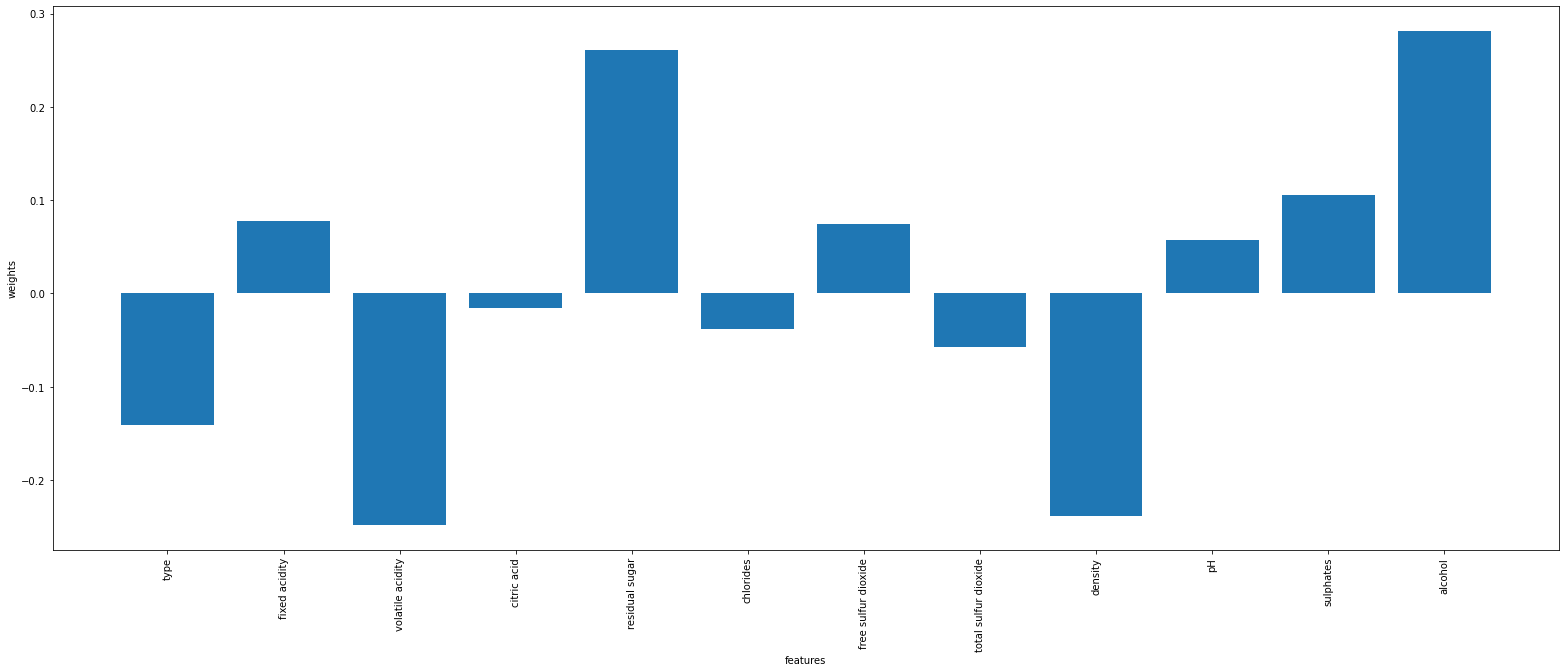

In [68]:
plt.figure(figsize=(27,10))
plt.xlabel('features')
plt.ylabel('weights')
plt.xticks(rotation = 90)
plt.bar(['type', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol'],reg.coef_)

### 5. Random Forest


In [69]:
df_rf =  pd.read_csv('https://raw.githubusercontent.com/rjrahul24/AppliedML-Project/main/data/wine_quality_pre.csv',sep = ",")
df_rf.head()

Unnamed: 0  type  fixed acidity  volatile acidity  citric acid  \
0           0     1            7.0              0.27         0.36   
1           1     1            6.3              0.30         0.34   
2           2     1            8.1              0.28         0.40   
3           3     1            7.2              0.23         0.32   
4           4     1            7.2              0.23         0.32   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0            20.7      0.045                 45.0                 170.0   
1             1.6      0.049                 14.0                 132.0   
2             6.9      0.050                 30.0                  97.0   
3             8.5      0.058                 47.0                 186.0   
4             8.5      0.058                 47.0                 186.0   

   density    pH  sulphates  alcohol  quality  good  
0   1.0010  3.00       0.45      8.8        6     0  
1   0.9940  3.30       0.49      9.5        6     0  
2   0.9951  3.26       0.44     10.1        6     0  
3   0.9956  3.19       0.40      9.9        6     0  
4   0.9956  3.19       0.40      9.9        6     0

In [70]:
X = df_rf[['type', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']]
y = df_rf['good']

In [71]:
# Split into Dev (80%) and Test (20%) Datasets, Random Forest doesn't need separate validation dataset
X_dev, X_test, y_dev, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify=y)

#### Use SMOTE to handle imbalanced dataset

In [72]:
print('development data distribution of labels before SMOTE: ')
y_dev.value_counts()

development data distribution of labels before SMOTE: 


0    4153
1    1017
Name: good, dtype: int64

In [73]:
# smote = SMOTE()
# X_dev_SMOTE, y_dev_SMOTE = smote.fit_resample(X_dev, y_dev)
# print(f'development data distribution of labels after SMOTE:')
# y_dev_SMOTE.value_counts()
# X_dev = X_dev_SMOTE
# y_dev = y_dev_SMOTE

#### Dummy Classifier
To define baseline performance, we began with a dummy classifier. 

In [74]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=42)
dummy_classifier.fit(X_dev,y_dev)
acc_baseline = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.8035576179427688


In [77]:
rf = RandomForestClassifier(n_jobs = -1)
rf.fit(X_dev, y_dev)

RandomForestClassifier(n_jobs=-1)

In [80]:
rf_pred = rf.predict(X_test)

recall = recall_score(y_test,rf_pred)
precision = precision_score(y_test,rf_pred)

print(f'Accuracy: {accuracy_score(y_test,rf_pred)}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F-1 Score: {f1_score(y_test,rf_pred)}')

Accuracy: 0.9010054137664346
Recall: 0.6023622047244095
Precision: 0.85
F-1 Score: 0.7050691244239633


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


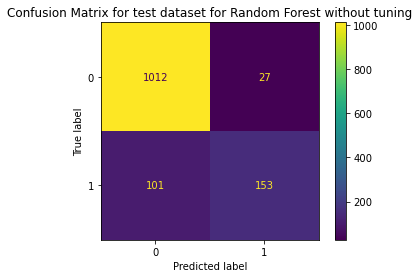

In [81]:
# Making the Confusion Matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.title("Confusion Matrix for test dataset for Random Forest without tuning")
plt.show()

In [82]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Tuning hyperparameters

In [83]:
parameter_grid = {'n_estimators':[100, 250, 400],
                  'max_depth':[5, 10, 15]}

rf_2 = make_pipeline(
    GridSearchCV(RandomForestClassifier(n_jobs = -1,warm_start=True), 
                 parameter_grid, 
                 cv=5, 
                 n_jobs=-1
                 )
)

rf_2.fit(X_dev, y_dev)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(n_jobs=-1,
                                                               warm_start=True),
                              n_jobs=-1,
                              param_grid={'max_depth': [5, 10, 15],
                                          'n_estimators': [100, 250, 400]}))])

In [84]:
rf_2_grid_search_results = rf_2.named_steps['gridsearchcv']

print(f'Best Score:{rf_2_grid_search_results.best_score_:0.5f}')
print(f'Best Params:{rf_2_grid_search_results.best_params_ }')
print(f'Test score:{rf_2.score(X_test,y_test):0.5f}')

Best Score:0.88085
Best Params:{'max_depth': 15, 'n_estimators': 100}
Test score:0.89095


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


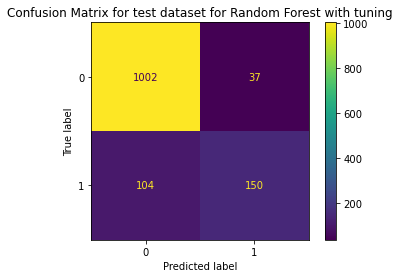

In [85]:
# Making the Confusion Matrix
plot_confusion_matrix(rf_2, X_test, y_test)  
plt.title("Confusion Matrix for test dataset for Random Forest with tuning")
plt.show()

### XGBoost

In [ ]:
parameter_grid = {'n_estimators':[100, 250, 400],
                  'max_depth':[5, 10, 15],
                  'learning_rate':[0.05,0.1,0.15]}

eval_metric= ['logloss']
xgb = make_pipeline(
    GridSearchCV(XGBClassifier(n_jobs = -1,eval_metric='logloss',verbosity = 0,silent=True), 
                 parameter_grid, 
                 cv=5, 
                 n_jobs=-1))

xgb.fit(X_dev, y_dev)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
               

In [ ]:
grid_search_XGB = xgb.named_steps["gridsearchcv"]
print(f'XGBoost Best Score:{grid_search_XGB.best_score_:0.5f}')
print(f'XGBoost Best Params:{grid_search_XGB.best_params_ }')
print(f'XGBoost Test score:{xgb.score(X_test,y_test):0.5f}')

XGBoost Best Score:0.87911
XGBoost Best Params:{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 250}
XGBoost Test score:0.89172


In [ ]:
xgb_y_pred = xgb.predict(X_test)
recall = recall_score(y_test,xgb_y_pred), 
precision = precision_score(y_test,xgb_y_pred)
print(f'Accuracy: {accuracy_score(y_test,xgb_y_pred)}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F-1 Score: {f1_score(y_test,xgb_y_pred)}')

Accuracy: 0.8917246713070379
Recall: (0.6023622047244095,)
Precision: 0.796875
F-1 Score: 0.6860986547085203


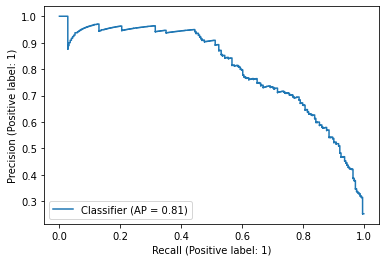

In [ ]:
probs = xgb.predict_proba(X_test)[:,1]
PrecisionRecallDisplay.from_predictions(y_test, probs)
plt.plot(recall,precision);

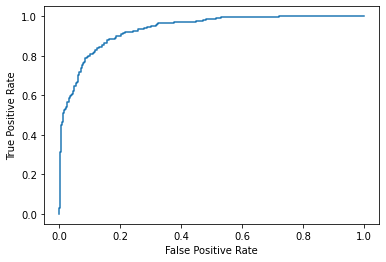

In [ ]:
fp, tp, thresholds = roc_curve(y_test, probs, pos_label = 1)
disp = RocCurveDisplay(fpr = fp, tpr = tp)
disp.plot()

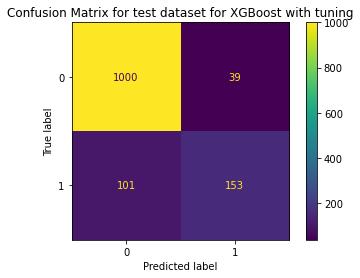

In [ ]:
# Making the Confusion Matrix
plot_confusion_matrix(xgb, X_test, y_test)  
plt.title("Confusion Matrix for test dataset for XGBoost with tuning")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

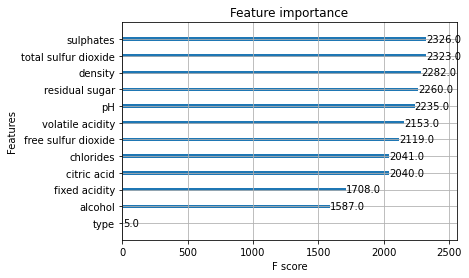

In [ ]:
plot_importance(grid_search_XGB.best_estimator_)

### LightGBM

In [ ]:
parameter_grid = {'num_leaves': [31, 63, 127],
                  'max_depth': [-1, 10, 20, 40],
                  'n_estimators': [100,200,300]}

lgbm = GridSearchCV(lgb.LGBMClassifier(random_state = 42), 
                    parameter_grid, 
                    cv = 5, 
                    error_score = 'raise')
lgbm.fit(X_dev,y_dev)

GridSearchCV(cv=5, error_score='raise',
             estimator=LGBMClassifier(random_state=42),
             param_grid={'max_depth': [-1, 10, 20, 40],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 63, 127]})

In [ ]:
print(f'LightGBM Best Score:{lgbm.best_score_:0.5f}')
print(f'LightGBM Best Params:{lgbm.best_params_ }')
print(f'LightGBM Test score:{lgbm.score(X_test,y_test):0.5f}')

LightGBM Best Score:0.88298
LightGBM Best Params:{'max_depth': -1, 'n_estimators': 200, 'num_leaves': 127}
LightGBM Test score:0.89559


In [ ]:
lgbm_y_pred = lgbm.predict(X_test)
recall = recall_score(y_test,lgbm_y_pred), 
precision = precision_score(y_test,lgbm_y_pred)
print(f'Accuracy: {accuracy_score(y_test,lgbm_y_pred)}')
print(f'Recall: {recall[0]}')
print(f'Precision: {precision}')
print(f'F-1 Score: {f1_score(y_test,lgbm_y_pred)}')

Accuracy: 0.8955916473317865
Recall: 0.6220472440944882
Precision: 0.8020304568527918
F-1 Score: 0.7006651884700665


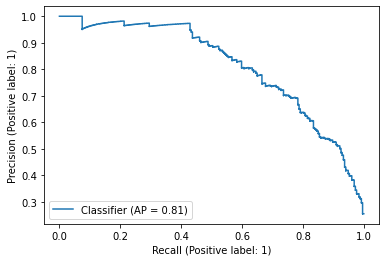

In [ ]:
probs = lgbm.predict_proba(X_test)[:,1]
PrecisionRecallDisplay.from_predictions(y_test, probs)
plt.plot(recall,precision);

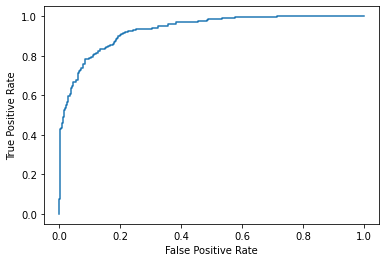

In [ ]:
fp, tp, thresholds = roc_curve(y_test, probs, pos_label = 1)
disp = RocCurveDisplay(fpr = fp, tpr = tp)
disp.plot()

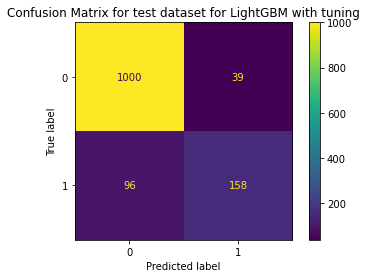

In [ ]:
# Making the Confusion Matrix
plot_confusion_matrix(lgbm, X_test, y_test)  
plt.title("Confusion Matrix for test dataset for LightGBM with tuning")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

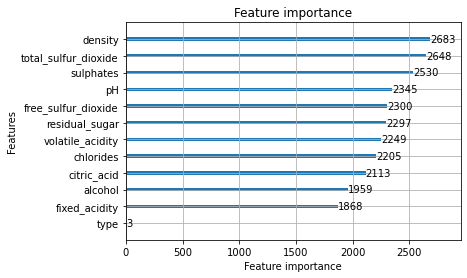

In [ ]:
lgb.plot_importance(lgbm.best_estimator_)

In [ ]:
pickle.dump(lgbm, open('../models/LightGBM.sav', 'wb'))

### Compare the performance of all RF models

In [ ]:
def CompilePRCurves(models, MainThresh = 0.6, ExtraThresh = [0.4, 0.8, 0.9], ExtraPrec = False):    
    sns.set(rc = {'figure.figsize':(10,7)})
    fig, ax = plt.subplots()
    
    #init metrics to capture
    AP = dict()
    f1 = dict()
    if ExtraPrec:
        keys = [MainThresh] + ExtraThresh
        keys.sort()
        all_recalls = {k: dict() for k in keys}
    else:
        all_recalls = {MainThresh: dict()}
    
    #Generate main PR Curves
    for name in models:
        fpath = "../models/"
        model_file = fpath + models[name]
        model = pickle.load(open(model_file,'rb'))
        probabilities = model.predict_proba(X_test)[:,1]   #X_test is a global variable specific to this notebook
        y_preds = model.predict(X_test)
        precision, recall, thresholds = precision_recall_curve(y_test, probabilities) #y_test is another global variable specific to this notebook
        ax.plot(recall, precision, linewidth=2)
        
        for prec_thresh in all_recalls.keys():
            rec_val = np.mean(recall[abs(precision - prec_thresh)<.001])
            if not np.isnan(rec_val):
                all_recalls[prec_thresh][name] = rec_val
            else:
                rec_val = np.mean(recall[abs(precision - prec_thresh)<.002]) #Get Recall when precision is at threshold within error of 0.002
                all_recalls[prec_thresh][name] = rec_val
                
        AP[name] = average_precision_score(y_test, probabilities)   #record AP
        f1[name] = f1_score(y_test, y_preds)   #record F1 score
   
    #Plot the recall point when precision is at the Main Precision Threshold (default 0.6)
    prec_60_y = [MainThresh] * len(all_recalls[MainThresh].keys())
    ax.plot(list(all_recalls[MainThresh].values()), prec_60_y, 'ro')    
    ax.axhline(MainThresh,linewidth=1, color='k')
    #Add other precision thresholds
    for thresh in ExtraThresh:
        ax.axhline(thresh, linewidth = 0.5, ls = '--', color = 'k')
    
    ax.set_xlabel("Recall (Positive Label: 1)")
    ax.set_ylabel("Precision (Positive Label : 1)")
    ax.set_title("Precision-Recall Curve for all Models", {'fontsize':14})
    ax.legend(list(models.keys()), loc=2 , bbox_to_anchor=(0.05, 0.5))
    
    plt.show()
    
    return AP, f1, all_recalls

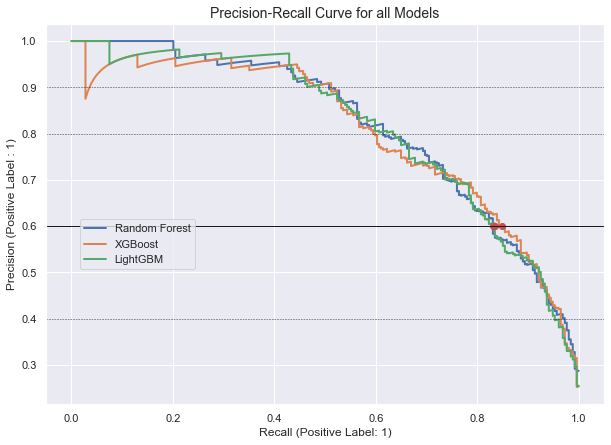

In [ ]:
models = {
    "Random Forest": "RandomForest.sav",
    "XGBoost": "XGBoost.sav",
    "LightGBM": "LightGBM.sav"
}


f1, AP, all_recalls = CompilePRCurves(models, ExtraPrec = True)

### 6. Neural Network

### MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPC_pipe = Pipeline(steps=[('preprocess', preprocess), ('MLPC', MLPClassifier())])
param_grid_MLPC = {
    'MLPC__hidden_layer_sizes': [(128,), (128, 64,), (128, 64, 32,)],
    'MLPC__alpha': [0.0001, 0.0005, 0.001],
    'MLPC__learning_rate_init': [0.001, 0.005, 0.01],
    'MLPC__max_iter': [50, 100, 200]
    }
MLPC_cv = GridSearchCV(
    MLPC_pipe,
    param_grid = param_grid_MLPC,
    cv = 5,
    error_score='raise')

MLPC_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['type',
                                                                          'fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                   

In [ ]:
print('Best Parameters:', MLPC_cv.best_params_)
print('Best Score:', MLPC_cv.best_score_)

Best Parameters: {'MLPC__alpha': 0.0005, 'MLPC__hidden_layer_sizes': (128, 64), 'MLPC__learning_rate_init': 0.01, 'MLPC__max_iter': 100}
Best Score: 0.8686653771760156


Evaluate model on test data.

In [ ]:
y_pred_MLPC = MLPC_cv.predict(X_test)
accuracy_MLPC = np.count_nonzero(y_pred_MLPC == y_test) / y_test.shape[0]
print('Test accuracy:', accuracy_MLPC)

Test accuracy: 0.848414539829853


C:\Users\austi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


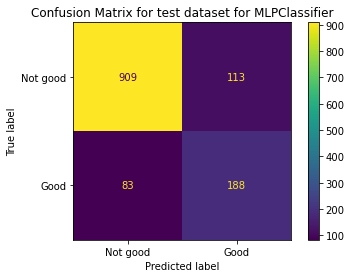

In [ ]:
plot_confusion_matrix(MLPC_cv, X_test, y_test, labels=['Not good', 'Good'])  
plt.title("Confusion Matrix for test dataset for MLPClassifier")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_MLPC))

              precision    recall  f1-score   support

        Good       0.62      0.69      0.66       271
    Not good       0.92      0.89      0.90      1022

    accuracy                           0.85      1293
   macro avg       0.77      0.79      0.78      1293
weighted avg       0.86      0.85      0.85      1293



### Keras Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Use best layer sizes from MLPClassifier
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(12,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
y_dev_enc = y_dev.replace('Not good', 0)
y_dev_enc = y_dev_enc.replace('Good', 1)
y_val_enc = y_val.replace('Not good', 0)
y_val_enc = y_val_enc.replace('Good', 1)
y_test_enc = y_test.replace('Not good', 0)
y_test_enc = y_test_enc.replace('Good', 1)

In [ ]:
eval_hist = model.fit(X_dev, y_dev_enc, batch_size=128, epochs=15, verbose=1, validation_data=(X_val, y_val_enc))

Epoch 1/15
33/33 [==============================] - 0s 3ms/step - loss: 0.7452 - accuracy: 0.7442 - val_loss: 0.5034 - val_accuracy: 0.8162
Epoch 2/15
33/33 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.8029 - val_loss: 0.4520 - val_accuracy: 0.8162
Epoch 3/15
33/33 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.8032 - val_loss: 0.4815 - val_accuracy: 0.8162
Epoch 4/15
33/33 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.8037 - val_loss: 0.4393 - val_accuracy: 0.8162
Epoch 5/15
33/33 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.8046 - val_loss: 0.5037 - val_accuracy: 0.7950
Epoch 6/15
33/33 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.8015 - val_loss: 0.4464 - val_accuracy: 0.8172
Epoch 7/15
33/33 [==============================] - 0s 806us/step - loss: 0.4526 - accuracy: 0.8039 - val_loss: 0.4457 - val_accuracy: 0.8162
Epoch 8/15
33/33 [

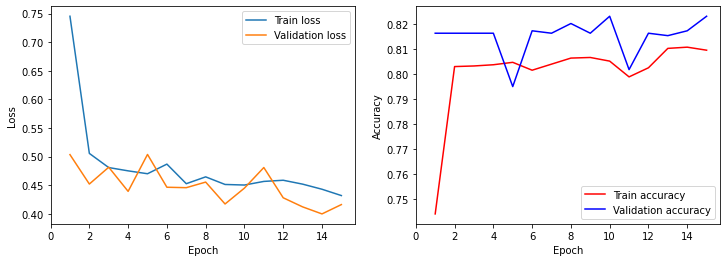

In [ ]:
metrics = eval_hist.history
epoch = np.arange(1, 16)

fig, axe = plt.subplots(1, 2, figsize=(12, 4))
axe[0].plot(epoch, metrics['loss'], label='Train loss')
axe[0].plot(epoch, metrics['val_loss'], label='Validation loss')
axe[0].set_xlabel('Epoch')
axe[0].set_ylabel('Loss')
axe[0].set_xticks(range(0, 16, 2))
axe[0].legend()

axe[1].plot(epoch, metrics['accuracy'], 'r', label='Train accuracy')
axe[1].plot(epoch, metrics['val_accuracy'], 'b', label='Validation accuracy')
axe[1].set_xlabel('Epoch')
axe[1].set_ylabel('Accuracy')
axe[1].set_xticks(range(0, 16, 2))
axe[1].legend()

Evaluate model performance on test data.

In [ ]:
test_scores = model.evaluate(X_test, y_test_enc, verbose=0)
print('Test loss: {:.3f}'.format(test_scores[0]))
print('Test accuracy: {:.3f}'.format(test_scores[1]))

Test loss: 0.439
Test accuracy: 0.807


Text(0.5, 1.0, 'Confusion Matrix for test dataset for Keras NN')

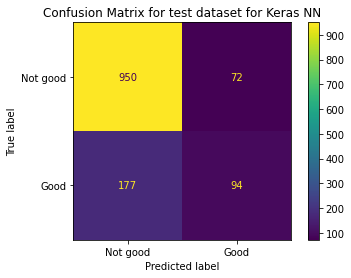

In [ ]:
y_pred_NN = model.predict(X_test)
y_pred_NN[y_pred_NN < 0.5] = 0
y_pred_NN[y_pred_NN >= 0.5] = 1
cm = confusion_matrix(y_test_enc, y_pred_NN)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not good', 'Good'])
disp.plot()
plt.title("Confusion Matrix for test dataset for Keras NN")

In [ ]:
print(classification_report(y_test_enc, y_pred_NN))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1022
           1       0.57      0.35      0.43       271

    accuracy                           0.81      1293
   macro avg       0.70      0.64      0.66      1293
weighted avg       0.78      0.81      0.79      1293



### Conclusions and Final Results 

From all the models trained and explored for our wine quality prediction problem, we believe that the best performing model in terms of both classification accuracy and precision is the LightGBM Classifier implemented with the hyperparameters ('max_depth': -1, 'n_estimators': 200, 'num_leaves': 127) and grid search cross validation set to 5. From the analysis, we can also conclude that the most important ingredient affecting wine quality are density of water to alcohol, presence of acetic acid that affects volatility and amount of residual sugar in the wine.